![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex my exploratory data analysis skills and dive into the entertainment industry. Our friends has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using my friends initial research, I'll delve into the Netflix data to see if I can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

I have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column         | Description                     |
|----------------|---------------------------------|
| `show_id`      | The ID of the show              |
| `type`         | Type of show                    |
| `title`        | Title of the show               |
| `director`     | Director of the show            |
| `cast`         | Cast of the show                |
| `country`      | Country of origin               |
| `date_added`   | Date added to Netflix           |
| `release_year` | Year of Netflix release         |
| `duration`     | Duration of the show in minutes |
| `description`  | Description of the show         |
| `genre`        | Show genre                      |

In [4]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Reading the CSV file
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [6]:
# Filter the data to keep only movies
netflix_subset = netflix_df[netflix_df['type'] == 'Movie']
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [7]:
# Extract the relevant columns
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [8]:
# Filter the data to keep only movies with a duration of less than 60 minutes
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


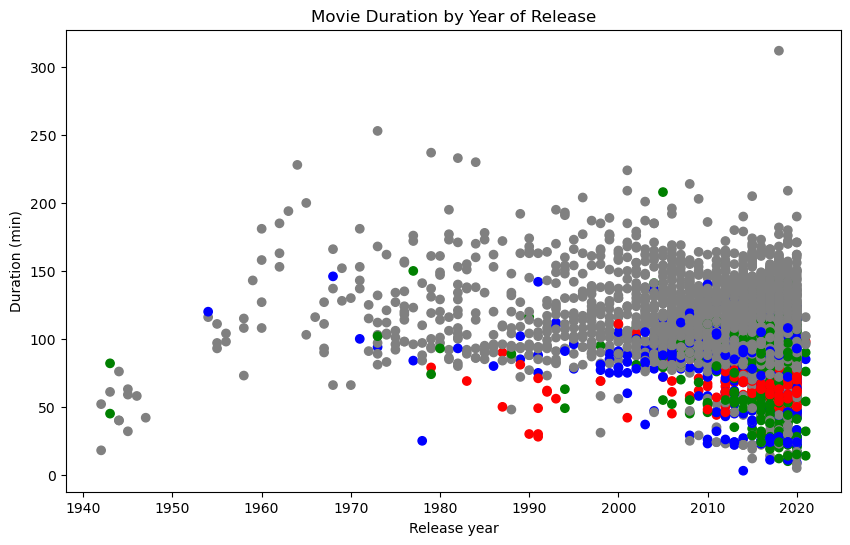

In [9]:
# Inspect the result to find possible contributing factors
# Initialize an empty list to store colors
colors = []

# Iterate through rows of netflix_movies DataFrame
for index, row in netflix_movies.iterrows():
    # Assign colors based on genre groups
    if row['genre'] == "Children":
        colors.append('blue')
    elif row['genre'] == "Documentaries":
        colors.append('green')
    elif row['genre'] == "Stand-Up":
        colors.append('red')
    else:
        colors.append('gray')  # Assigning 'Other' genre to gray color

# Create a scatter plot for movie duration by release year
fig = plt.figure(figsize=(10, 6))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)

# Set labels and title
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

In [10]:
# Are we certain that movies are getting shorter?
answer = "no"
print("Are we certain that movies are getting shorter?", answer)

Are we certain that movies are getting shorter? no
